# Marketing Analytics Final Project


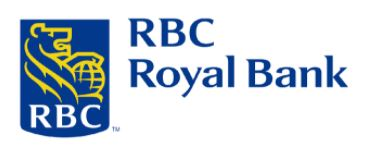


Siddhesh D. Munagekar






In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
!pip install pandas-profiling
!pip install -U pandas-profiling
!pip install catboost
import pandas_profiling
from pandas_profiling import ProfileReport
import plotly.offline as po
import plotly.graph_objs as go

Mounted at /content/drive
     |████████████████████████████████| 266kB 5.8MB/s 
     |████████████████████████████████| 3.1MB 34.3MB/s 
     |████████████████████████████████| 604kB 42.9MB/s 
     |████████████████████████████████| 71kB 5.9MB/s 
     |████████████████████████████████| 71kB 6.7MB/s 
     |████████████████████████████████| 296kB 44.9MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=eb0a7c68b737560e92ec3b05752c0ede4f363a650127624bbf7a3127789d7e06
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built htmlmin
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
  Found existing installation: pandas-profiling 1.4.1
    Uninstalling pandas-profiling-1.4.1:
      Successfully uninstalled pandas-profiling-1.4.1
     |████████████████████████████████| 66.3MB 61kB/s 


In [ ]:
bank  = pd.read_csv('/content/drive/MyDrive/Marketing Analytics/Final_Project/Churn_Modelling.csv')
bank

RowNumber  CustomerId    Surname  ...  IsActiveMember EstimatedSalary Exited
0             1    15634602   Hargrave  ...               1       101348.88      1
1             2    15647311       Hill  ...               1       112542.58      0
2             3    15619304       Onio  ...               0       113931.57      1
3             4    15701354       Boni  ...               0        93826.63      0
4             5    15737888   Mitchell  ...               1        79084.10      0
...         ...         ...        ...  ...             ...             ...    ...
9995       9996    15606229   Obijiaku  ...               0        96270.64      0
9996       9997    15569892  Johnstone  ...               1       101699.77      0
9997       9998    15584532        Liu  ...               1        42085.58      1
9998       9999    15682355  Sabbatini  ...               0        92888.52      1
9999      10000    15628319     Walker  ...               0        38190.78      0

[10000 rows x 14 columns]

# Exploratory Data Analysis

In [ ]:
pandas_profiling.ProfileReport(pd.read_csv('/content/drive/MyDrive/Marketing Analytics/Final_Project/Churn_Modelling.csv'))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
bank.isnull().sum().sort_values(ascending=False)

Exited             0
EstimatedSalary    0
IsActiveMember     0
HasCrCard          0
NumOfProducts      0
Balance            0
Tenure             0
Age                0
Gender             0
Geography          0
CreditScore        0
Surname            0
CustomerId         0
RowNumber          0
dtype: int64

In [ ]:
print("Rows :",bank.shape[0])
print("Columns :",bank.shape[1])
print("Features :",bank.columns.tolist())
print("Unique Values",bank.nunique())

Rows : 10000
Columns : 14
Features : ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
Unique Values RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64


In [ ]:
bank =bank.replace(" ",np.NaN)
bank.head()

RowNumber  CustomerId   Surname  ...  IsActiveMember EstimatedSalary Exited
0          1    15634602  Hargrave  ...               1       101348.88      1
1          2    15647311      Hill  ...               1       112542.58      0
2          3    15619304      Onio  ...               0       113931.57      1
3          4    15701354      Boni  ...               0        93826.63      0
4          5    15737888  Mitchell  ...               1        79084.10      0

[5 rows x 14 columns]

In [ ]:
bank.isnull().sum().sort_values(ascending=False)
#Removing Row number from bank.drop
bank=bank.drop(['RowNumber'],axis=1)

#Over view of Data with important parameters

In [ ]:
def data_info(bank):
  with pd.option_context("display.max_colwidth",20):
    info=pd.DataFrame()
    info['Data Types']=bank.dtypes
    info['Percent of missing']=bank.isnull().sum() *100/len(bank)
    info['No of Unique']=bank.apply(lambda x:len(x.unique()))
    info['Unique Values']=bank.apply(lambda x:x.unique())
    return info.sort_values('Data Types')

In [ ]:
data_info(bank)

Data Types  ...                                      Unique Values
CustomerId           int64  ...  [15634602, 15647311, 15619304, 15701354, 15737...
CreditScore          int64  ...  [619, 608, 502, 699, 850, 645, 822, 376, 501, ...
Age                  int64  ...  [42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 2...
Tenure               int64  ...                 [2, 1, 8, 7, 4, 6, 3, 10, 5, 9, 0]
NumOfProducts        int64  ...                                       [1, 3, 2, 4]
HasCrCard            int64  ...                                             [1, 0]
IsActiveMember       int64  ...                                             [1, 0]
Exited               int64  ...                                             [1, 0]
Balance            float64  ...  [0.0, 83807.86, 159660.8, 125510.82, 113755.78...
EstimatedSalary    float64  ...  [101348.88, 112542.58, 113931.57, 93826.63, 79...
Surname             object  ...  [Hargrave, Hill, Onio, Boni, Mitchell, Chu, Ba...
Geography           object  ...                           [France, Spain, Germany]
Gender              object  ...                                     [Female, Male]

[13 rows x 4 columns]

In [ ]:
bank['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
#Visualizing Total Customer Churn
plot_by_churn_labels=bank['Exited'].value_counts().keys().tolist()
plot_by_churn_values=bank['Exited'].value_counts().values.tolist()


plot_data=[
      go.Pie(labels=plot_by_churn_labels,
             values=plot_by_churn_values,
             marker=dict(colors=['jam','yellow'],
                        line= dict(color="black",
                                  width=2)),
               rotation=90,
             hoverinfo="label+value",
             hole=.6)
                         
           
             
]
plot_layout= go.Layout(dict(title="Count of Customer Churn",
                            plot_bgcolor="rgb(243,243,243)",
                            paper_bgcolor="rgb(243,243,243)",))

fig=go.Figure(data=plot_data,layout=plot_layout)
po.iplot(fig)


In [ ]:
#Selecting all the data rows where exit ==1
churn = bank[bank['Exited']==1]
not_churn =bank[bank['Exited']==0]
print("Total Customer who remained with the bank",len(not_churn))
print("Total Customer who left the bank",len(churn))


Total Customer who remained with the bank 7963
Total Customer who left the bank 2037


In [ ]:
cat_cols   = bank.nunique()[bank.nunique() < 6].keys().tolist()

target_col = ["Exited"]
cat_cols

['Geography',
 'Gender',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Exited']

In [ ]:
cat_cols=[x for x in cat_cols if x not in target_col]
cat_cols


['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

In [ ]:
def plot_pie(column) :
    
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    
    trace2 = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non churn customers" 
                   )

    
    
    layout = go.Layout(dict(title = column + " distribution in customer Churn ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .20, y = .5),
                                           dict(text = "Non churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .82,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    po.iplot(fig)

In [ ]:
for i in cat_cols:
  plot_pie(i)

From the above Donut chart we can justify that


1.   **Geography** : German Customers are more likely to leave bank than customers from France and Spain

1.   **Gender**  :Female Customers are more likely to churn than Male Customers
2.   **No of Products**  :Customers with one product are more likely to churn than Customer with many products.

2.   **Has Credit Card** : Customers with credit Card are more likey to churn than customers with no credit card.

3.  **Is Active Member** : Customers who are inactive in banking are more likey to leave. 



# Customers with Shorter Period are more likely to churn than customer with Longer period

In [ ]:
import plotly.express as px
plot_by_tenure=bank.groupby('Tenure').Exited.mean().reset_index()
fig = px.scatter(plot_by_tenure, x="Tenure", y="Exited", trendline="ols",title="Tenure Relationship with Customer Churn",color="Exited")
fig.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



#Average Bank Balance vs customer Churn

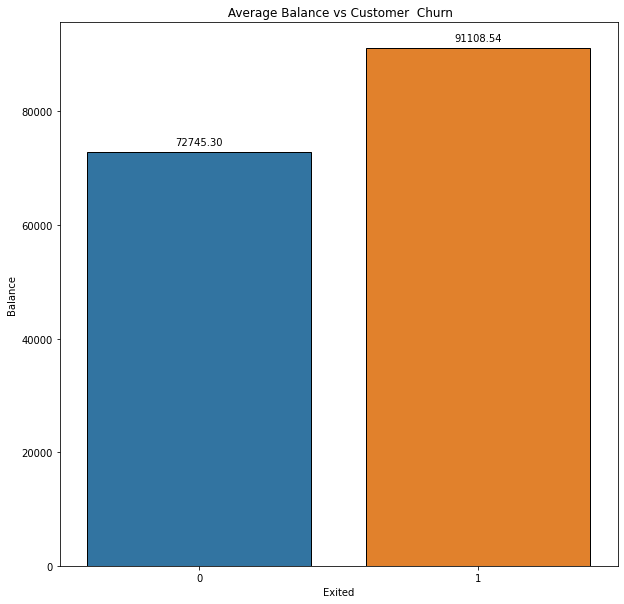

In [ ]:
plt.figure(figsize=(10, 10))
splot=sns.barplot(x='Exited',y='Balance',data=bank,ci=None,edgecolor="black")
plt.title(' Average Balance vs Customer  Churn')
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.2f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

#Customers with low credit score are more likey to Churn

In [ ]:
plot_by_credit=bank.groupby('CreditScore').Exited.mean().reset_index()

fig = px.scatter(plot_by_credit, x="CreditScore", y="Exited", trendline="ols",title="Credit score Relationship with Customer",color="Exited")
fig.show()

# Age group relationship with Customer Churn

In [ ]:
plot_by_Age=bank.groupby('Age').Exited.mean().reset_index()

fig = px.scatter(plot_by_Age, x="Age", y="Exited", trendline="ols",title="Relationship of Customer Age with Churn",color="Exited")
fig.show()


# Converting String columns to Categorical columns

In [ ]:

bank['NumOfProducts']=bank['NumOfProducts'].astype('category')
bank['Gender']=bank['Gender'].astype('category')
bank['Geography']=bank['Geography'].astype('category')


In [ ]:
#Assigning Exited column with bank target obj.
bank_target=bank['Exited']
bank_target=bank_target.astype('category')


# One Hot Encoding categorical Features

In [ ]:
#To prevent dummy variable trap and to avoid multi colinearity 
bank['Gender'].replace(['Female','Male'],[0,1], inplace =True)
bank=pd.get_dummies(bank,columns=['Geography','NumOfProducts','Tenure'],drop_first=True)

In [ ]:
bank.head()

CustomerId   Surname  CreditScore  ...  Tenure_8  Tenure_9  Tenure_10
0    15634602  Hargrave          619  ...         0         0          0
1    15647311      Hill          608  ...         0         0          0
2    15619304      Onio          502  ...         1         0          0
3    15701354      Boni          699  ...         0         0          0
4    15737888  Mitchell          850  ...         0         0          0

[5 rows x 25 columns]

In [ ]:
##Excluding Exited Columns from bank as it is our target variable and CustomerID having high cardinality ########

X= bank.loc[:,~bank.columns.str.contains('Exited')]
X=X.loc[:,~X.columns.str.contains('Surname')]
X= X.loc[:,~X.columns.str.contains('CustomerId')]
print(X.shape)
X.head()


(10000, 22)


CreditScore  Gender  Age    Balance  ...  Tenure_7  Tenure_8  Tenure_9  Tenure_10
0          619       0   42       0.00  ...         0         0         0          0
1          608       0   41   83807.86  ...         0         0         0          0
2          502       0   42  159660.80  ...         0         1         0          0
3          699       0   39       0.00  ...         0         0         0          0
4          850       0   43  125510.82  ...         0         0         0          0

[5 rows x 22 columns]

In [ ]:
X.tail()

CreditScore  Gender  Age  ...  Tenure_8  Tenure_9  Tenure_10
9995          771       1   39  ...         0         0          0
9996          516       1   35  ...         0         0          1
9997          709       0   36  ...         0         0          0
9998          772       1   42  ...         0         0          0
9999          792       0   28  ...         0         0          0

[5 rows x 22 columns]

# Standard  Scaling features

In [ ]:
#Storing the column names

from sklearn.preprocessing import StandardScaler
col_list=X.columns
std_scale=StandardScaler()
columns_to_scale=['CreditScore','Age','Balance','EstimatedSalary']
X[columns_to_scale]=std_scale.fit_transform(X[columns_to_scale])

print(X.shape)
X.head(6)


(10000, 22)


CreditScore  Gender       Age  ...  Tenure_8  Tenure_9  Tenure_10
0    -0.326221       0  0.293517  ...         0         0          0
1    -0.440036       0  0.198164  ...         0         0          0
2    -1.536794       0  0.293517  ...         1         0          0
3     0.501521       0  0.007457  ...         0         0          0
4     2.063884       0  0.388871  ...         0         0          0
5    -0.057205       1  0.484225  ...         1         0          0

[6 rows x 22 columns]

# Splitting the Data into train and test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,bank_target,test_size=0.25,random_state=50)

print("Shape of X_train is ",X_train.shape ,"Shape of y_train is ",y_train.shape)
print("Shape of X_test is ",X_test.shape ,"Shape of y_test is ",y_test.shape)

Shape of X_train is  (7500, 22) Shape of y_train is  (7500,)
Shape of X_test is  (2500, 22) Shape of y_test is  (2500,)


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression(solver='liblinear',C=0.1)
lr.fit(X_train,y_train)
lr_train_acc=lr.score(X_train,y_train)
lr_test_acc= lr.score(X_test,y_test)
print("Logistic Regression Train Score",lr_train_acc," & test Score",lr_test_acc)


Logistic Regression Train Score 0.8410666666666666  & test Score 0.8408


# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
deci_tree= DecisionTreeClassifier()
deci_tree.fit(X_train,y_train)
dt_train_acc=deci_tree.score(X_train,y_train)
dt_test_acc=deci_tree.score(X_test,y_test)
print("Decision Tree  Train Score",dt_train_acc," & test Score",dt_test_acc)

Decision Tree  Train Score 1.0  & test Score 0.7844


# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_frst =RandomForestClassifier(max_depth=6)
random_frst.fit(X_train,y_train)
rf_train_acc=random_frst.score(X_train,y_train)
rf_test_acc= random_frst.score(X_test,y_test)
print("Random Forest Train Score",rf_train_acc," & test Score",rf_test_acc)

Random Forest Train Score 0.8605333333333334  & test Score 0.8572


# Support Vector Classifier

In [ ]:
from sklearn.svm import SVC
svc=SVC(kernel='linear',probability=True,random_state=50)
svc.fit(X_train,y_train)
svc_train_acc=svc.score(X_train,y_train)
svc_test_acc=svc.score(X_test,y_test)
print("SVC Train Score",svc_train_acc," & test Score",svc_test_acc)

SVC Train Score 0.8185333333333333  & test Score 0.8232


# K Nearest Neighbor Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
knn_train_acc=knn.score(X_train,y_train)
knn_test_acc=knn.score(X_test,y_test)
print("K Nearest Neighbors Train Score ", knn_train_acc,"& test Score",knn_test_acc)

K Nearest Neighbors Train Score  0.8504 & test Score 0.8284


# Catboost Classifier

In [ ]:
import catboost 
from catboost import CatBoostClassifier
cat= CatBoostClassifier(learning_rate=0.1,n_estimators=47,max_depth=4)
model=cat.fit(X_train,y_train,plot=True)
cat_test_score=cat.score(X_test,y_test)
cat_train_score=cat.score(X_train,y_train)
print("Cat boost Test score is",cat_test_score," and Train score is ",cat_train_score)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6206207	total: 5.56ms	remaining: 256ms
1:	learn: 0.5615879	total: 12.3ms	remaining: 276ms
2:	learn: 0.5186947	total: 21.7ms	remaining: 319ms
3:	learn: 0.4830720	total: 29.4ms	remaining: 316ms
4:	learn: 0.4602386	total: 37ms	remaining: 311ms
5:	learn: 0.4405515	total: 44.5ms	remaining: 304ms
6:	learn: 0.4236321	total: 51.6ms	remaining: 295ms
7:	learn: 0.4104647	total: 60.2ms	remaining: 293ms
8:	learn: 0.4025600	total: 67.2ms	remaining: 284ms
9:	learn: 0.3939566	total: 79.5ms	remaining: 294ms
10:	learn: 0.3862036	total: 84.7ms	remaining: 277ms
11:	learn: 0.3811054	total: 95.5ms	remaining: 279ms
12:	learn: 0.3743037	total: 101ms	remaining: 265ms
13:	learn: 0.3700506	total: 110ms	remaining: 259ms
14:	learn: 0.3651220	total: 117ms	remaining: 249ms
15:	learn: 0.3625144	total: 122ms	remaining: 237ms
16:	learn: 0.3590689	total: 129ms	remaining: 228ms
17:	learn: 0.3561968	total: 136ms	remaining: 218ms
18:	learn: 0.3522814	total: 141ms	remaining: 208ms
19:	learn: 0.3502887	total: 148

In [ ]:
model=cat.fit(X_train,y_train,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6206207	total: 6.52ms	remaining: 300ms
1:	learn: 0.5615879	total: 11.4ms	remaining: 257ms
2:	learn: 0.5186947	total: 16.2ms	remaining: 237ms
3:	learn: 0.4830720	total: 23.1ms	remaining: 248ms
4:	learn: 0.4602386	total: 28.9ms	remaining: 243ms
5:	learn: 0.4405515	total: 33.5ms	remaining: 229ms
6:	learn: 0.4236321	total: 38.1ms	remaining: 217ms
7:	learn: 0.4104647	total: 42.8ms	remaining: 209ms
8:	learn: 0.4025600	total: 47.4ms	remaining: 200ms
9:	learn: 0.3939566	total: 52.6ms	remaining: 195ms
10:	learn: 0.3862036	total: 56.7ms	remaining: 186ms
11:	learn: 0.3811054	total: 61.5ms	remaining: 180ms
12:	learn: 0.3743037	total: 78.3ms	remaining: 205ms
13:	learn: 0.3700506	total: 85.8ms	remaining: 202ms
14:	learn: 0.3651220	total: 91.5ms	remaining: 195ms
15:	learn: 0.3625144	total: 98.1ms	remaining: 190ms
16:	learn: 0.3590689	total: 105ms	remaining: 186ms
17:	learn: 0.3561968	total: 112ms	remaining: 180ms
18:	learn: 0.3522814	total: 120ms	remaining: 177ms
19:	learn: 0.3502887	tota

# Model Comparision

In [ ]:
model_comparison=pd.DataFrame({
 'Model':['Logistic regression','Decision Tree Classifier','Random Forest Classifier','Support Vector Classifier','K Neighbors Classifier','CatBoost Classifier'],
 'Test Score':[lr_test_acc,dt_test_acc,rf_test_acc,svc_test_acc,knn_test_acc,cat_test_score] ,
  'Train Score':[lr_train_acc,dt_train_acc,rf_train_acc,svc_train_acc,knn_train_acc,cat_train_score]})

model_comparison=model_comparison.sort_values(by='Test Score', ascending=False)
model_comparison=model_comparison.reset_index()
model_comparison=model_comparison.drop('index',axis=1)
model_comparison

Model  Test Score  Train Score
0        CatBoost Classifier      0.8620     0.866400
1   Random Forest Classifier      0.8572     0.860533
2        Logistic regression      0.8408     0.841067
3     K Neighbors Classifier      0.8284     0.850400
4  Support Vector Classifier      0.8232     0.818533
5   Decision Tree Classifier      0.7844     1.000000

Considering CatBoost Classifier as the model for analysis as it gave high test accuracy with low variance and low bias.

# Confusion Matrix of CatBoost Classifier

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1999
           1       0.76      0.46      0.57       501

    accuracy                           0.86      2500
   macro avg       0.82      0.71      0.74      2500
weighted avg       0.85      0.86      0.85      2500



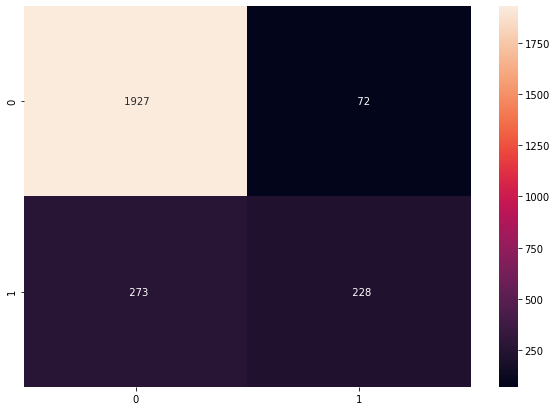

In [ ]:
#Generate confusion matrix for logistic regression model as it has shown low variance and low bias
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_pred=cat.predict(X_test)
print(classification_report(y_test,y_pred))



cm= confusion_matrix(y_true=y_test,y_pred=y_pred)
#Creating dataframe of Confusion Matrix

df_cm=pd.DataFrame(cm,index=(0,1),columns=(0,1))
plt.figure(figsize=(10,7))
sns.heatmap(df_cm,annot=True,fmt='5g')

In [ ]:
#Predict the probability of Churn for each customer
bank['Probability_of_Churn']=cat.predict_proba(bank[X_test.columns])[:,1]  

In [ ]:
bank.head()

CustomerId   Surname  CreditScore  ...  Tenure_9  Tenure_10  Probability_of_Churn
0    15634602  Hargrave          619  ...         0          0              0.142563
1    15647311      Hill          608  ...         0          0              0.276190
2    15619304      Onio          502  ...         0          0              0.981385
3    15701354      Boni          699  ...         0          0              0.328058
4    15737888  Mitchell          850  ...         0          0              0.271582

[5 rows x 26 columns]

In [ ]:
#Feature Engineering
from sklearn.feature_selection import RFE
rfe = RFE(cat, 5)
rfe = rfe.fit(X_train, y_train)
print("Important Features for Analysis",X_train.columns[rfe.support_])

0:	learn: 0.6206207	total: 7.04ms	remaining: 324ms
1:	learn: 0.5615879	total: 10.5ms	remaining: 237ms
2:	learn: 0.5186947	total: 14.1ms	remaining: 206ms
3:	learn: 0.4830720	total: 17.8ms	remaining: 191ms
4:	learn: 0.4602386	total: 21.6ms	remaining: 181ms
5:	learn: 0.4405515	total: 26.6ms	remaining: 182ms
6:	learn: 0.4236321	total: 31.8ms	remaining: 182ms
7:	learn: 0.4104647	total: 36ms	remaining: 175ms
8:	learn: 0.4025600	total: 39.9ms	remaining: 168ms
9:	learn: 0.3939566	total: 43.8ms	remaining: 162ms
10:	learn: 0.3862036	total: 47.7ms	remaining: 156ms
11:	learn: 0.3811054	total: 51.7ms	remaining: 151ms
12:	learn: 0.3743037	total: 56.1ms	remaining: 147ms
13:	learn: 0.3700506	total: 61.4ms	remaining: 145ms
14:	learn: 0.3651220	total: 66.1ms	remaining: 141ms
15:	learn: 0.3625144	total: 70.2ms	remaining: 136ms
16:	learn: 0.3590689	total: 74.5ms	remaining: 131ms
17:	learn: 0.3561968	total: 78.7ms	remaining: 127ms
18:	learn: 0.3522814	total: 82.9ms	remaining: 122ms
19:	learn: 0.3502887	tot

# Targeting a Particular Age group which is likely to churn

On the basis of exploratory analysis selecting ,secelcting age group between 52 to 60

In [ ]:
target_age_grp=bank[bank['Age'].between(52,60)]


From the below dataframe we can say that females in the age group of 52 to 60 are more likely to leave bank

In [ ]:
# Female Customers  are more likey to churn than male Customers
target_age_grp[['CustomerId','Surname','Age','Gender','Probability_of_Churn']].sort_values(by='Probability_of_Churn',ascending=False)

CustomerId      Surname  Age  Gender  Probability_of_Churn
1265    15662291     Davidson   55       0              0.981385
1962    15692416    Aikenhead   52       0              0.981385
4054    15734762     Ignatiev   56       0              0.981385
4842    15624820         Ross   56       1              0.970675
6831    15696989  Chukwueloka   52       0              0.943262
...          ...          ...  ...     ...                   ...
7280    15611973         Tuan   55       1              0.029873
4165    15725478    McClemans   60       1              0.029873
1888    15663921       Pisani   60       1              0.029873
3537    15632324       Pisani   59       1              0.029873
198     15656176      Jenkins   57       1              0.029539

[678 rows x 5 columns]

# Understanding and highlighting important features which are received from recursive feature engineering and their impact on Churn Probability.

In [ ]:
target=target_age_grp.groupby(['IsActiveMember','Age'])
final_outcome=target['CustomerId','Surname','Gender',
                     'Balance','CreditScore','Probability_of_Churn'].last().sort_values(by ='Probability_of_Churn',ascending=False)
final_outcome

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



CustomerId  ... Probability_of_Churn
IsActiveMember Age              ...                     
0              53     15769959  ...             0.712220
               57     15728005  ...             0.643302
               52     15693690  ...             0.613221
               55     15767818  ...             0.603190
               58     15791321  ...             0.599941
               59     15603135  ...             0.534558
               54     15623989  ...             0.528504
               60     15600399  ...             0.528504
               56     15716984  ...             0.321019
1              58     15692664  ...             0.276190
               52     15701932  ...             0.271582
               59     15789339  ...             0.189031
               55     15784042  ...             0.186292
               56     15802909  ...             0.134300
               53     15735078  ...             0.048704
               60     15736778  ...             0.048704
               57     15808971  ...             0.043243
               54     15644994  ...             0.036728

[18 rows x 6 columns]

Most of the Inactive Customers between the age group of 52 to 60  having low bank balance and credit score are more  likely to Churn